<a href="https://colab.research.google.com/github/NitishMamadgi/DT_LSTM_prediction/blob/main/DT_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values in each column:
 Event    0
dtype: int64


<ipython-input-2-9f59f6c5e9ef>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Event', data=train_df, palette='viridis')


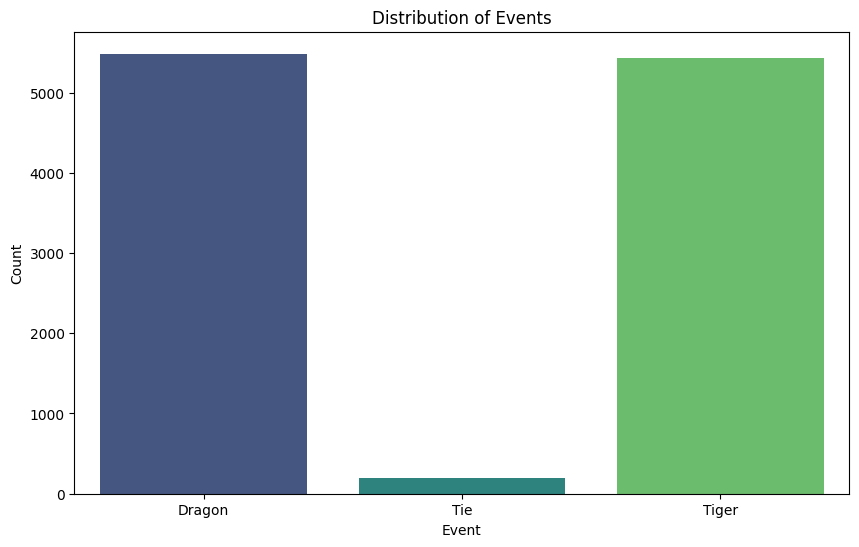

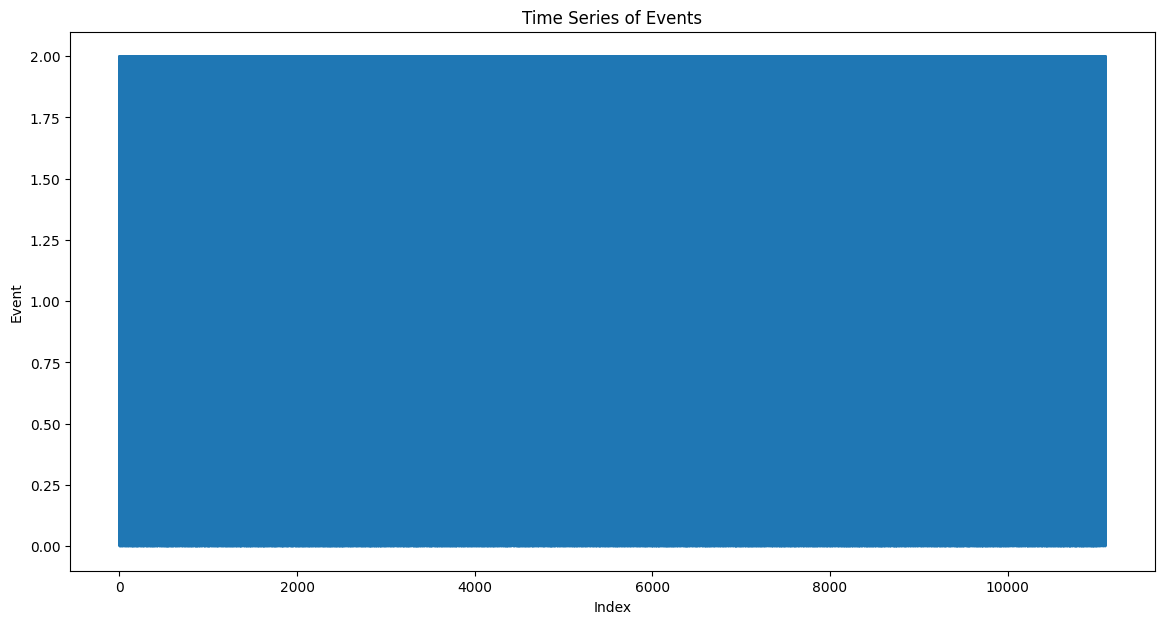

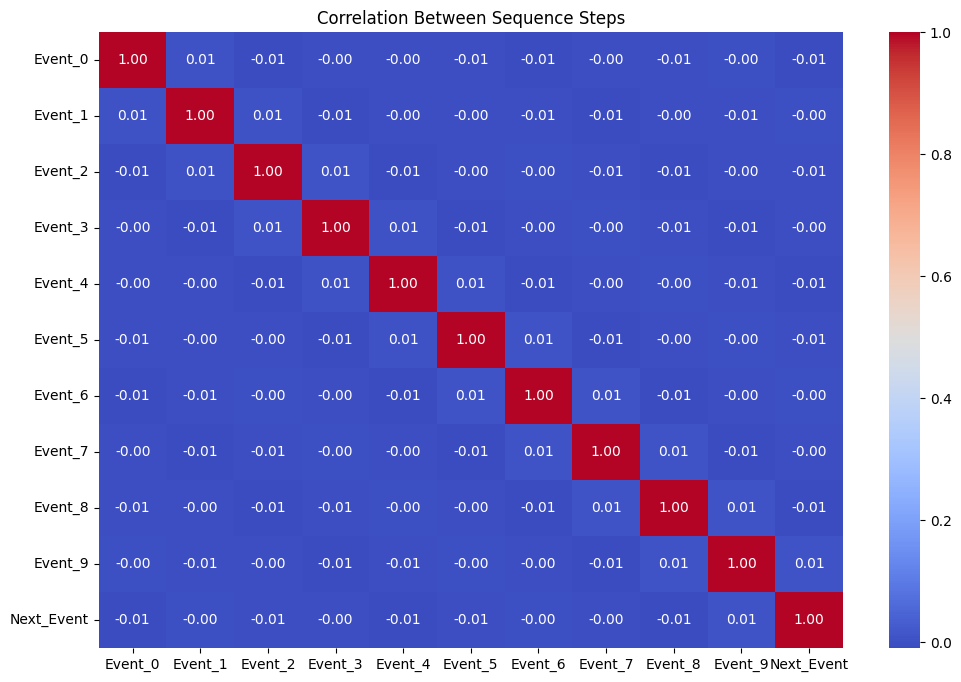

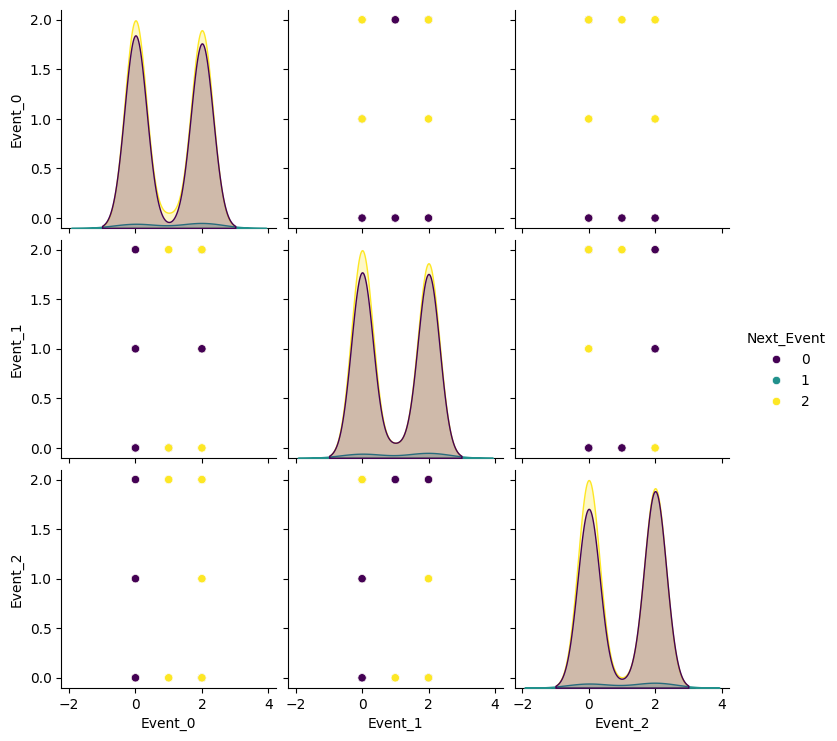

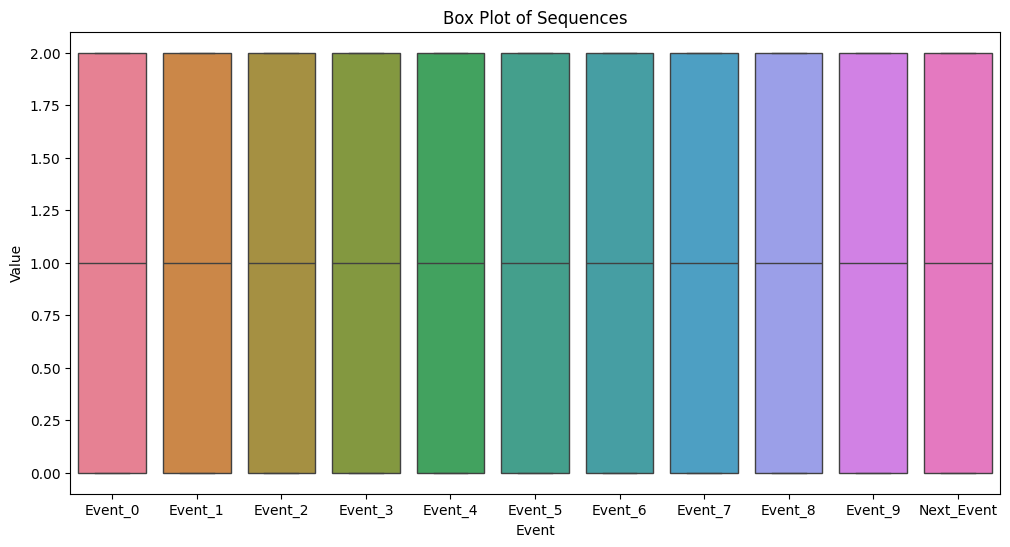

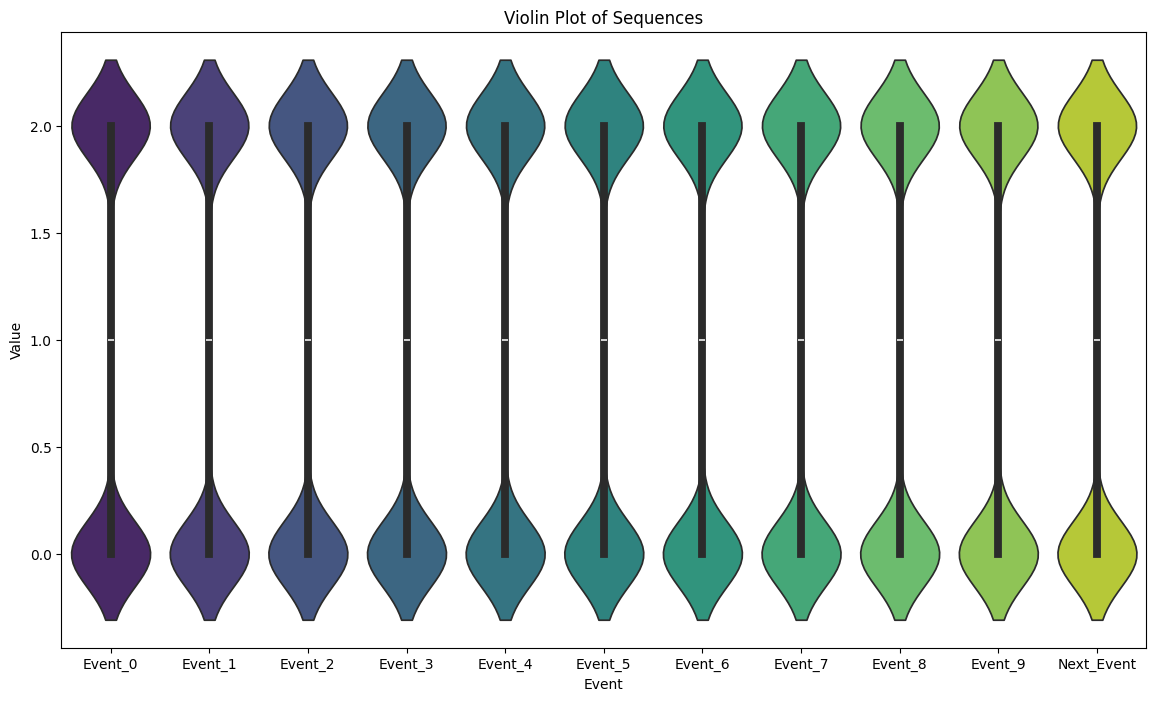

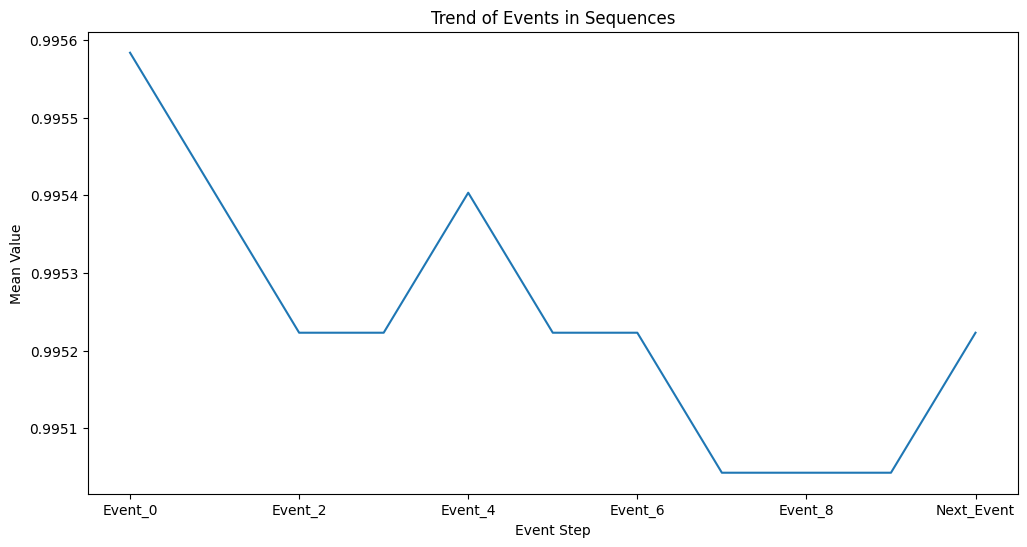

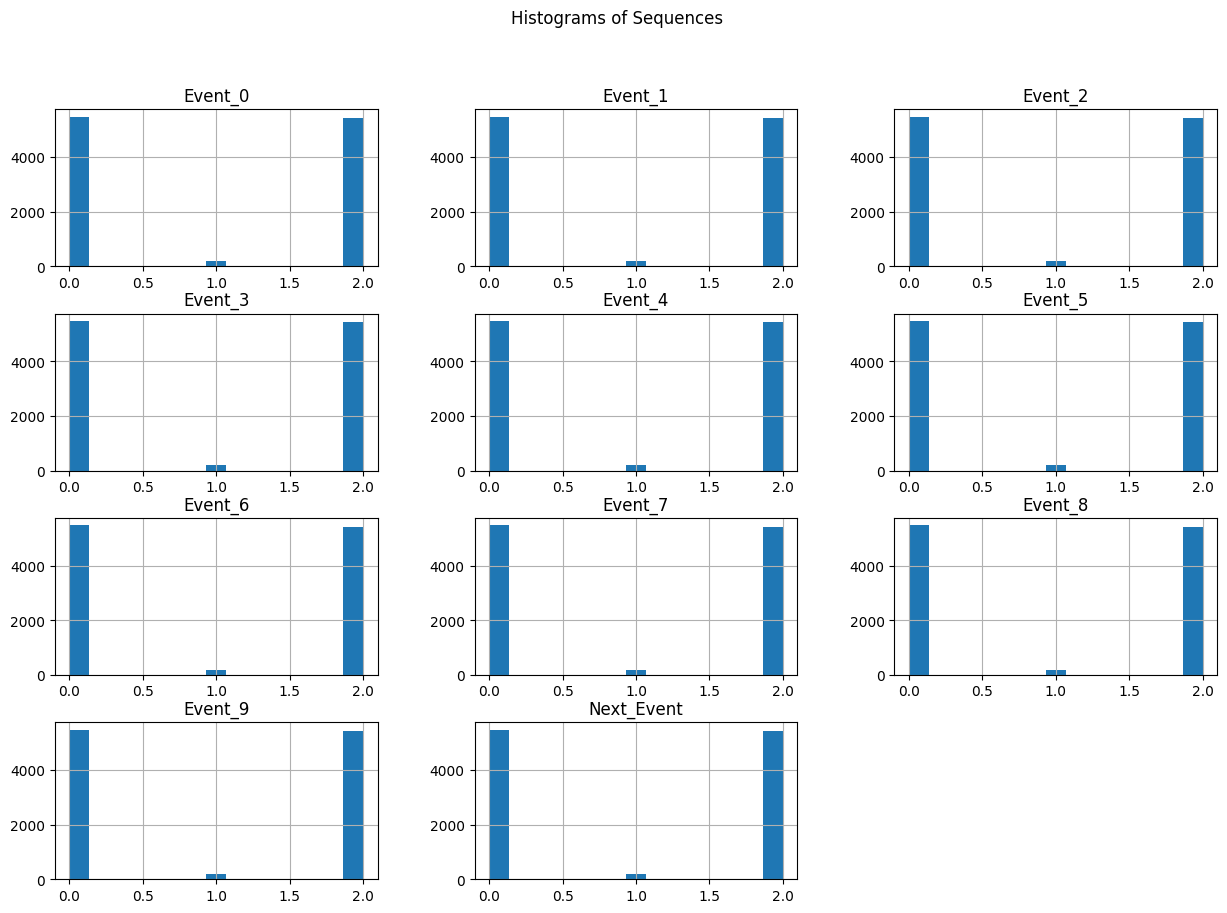

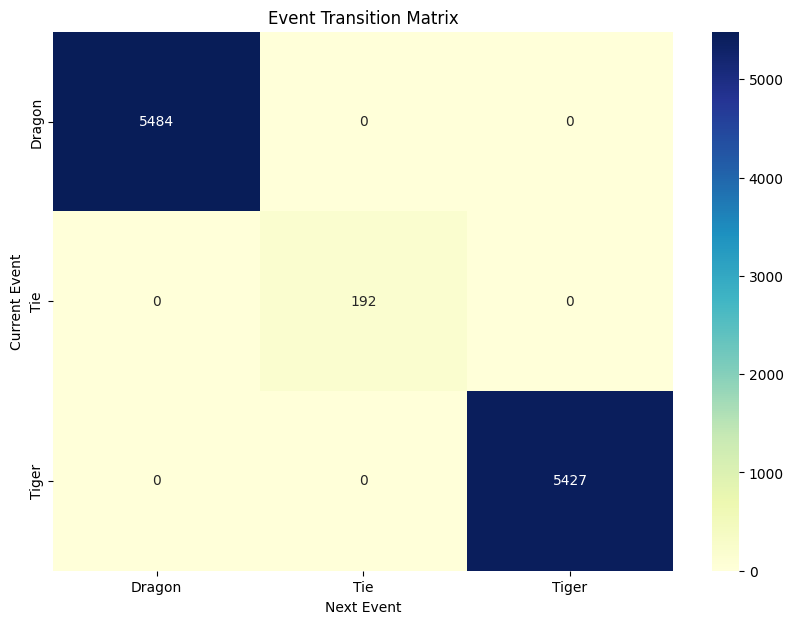

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the dataset
train_df = pd.read_csv('DT_training_dataset.csv')

# Drop the 'ID' column if it exists
if 'ID' in train_df.columns:
    train_df.drop(columns=['ID'], inplace=True)

# Encode 'Dragon', 'Tiger', and 'Tie' as integers
label_encoder = LabelEncoder()
train_df['Event'] = label_encoder.fit_transform(train_df['Event'])

# Check for missing values
print("Missing values in each column:\n", train_df.isnull().sum())

# Distribution of events
plt.figure(figsize=(10, 6))
sns.countplot(x='Event', data=train_df, palette='viridis')
plt.title('Distribution of Events')
plt.xlabel('Event')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=label_encoder.classes_)
plt.show()

# Time series visualization of events
plt.figure(figsize=(14, 7))
train_df['Event'].plot()
plt.title('Time Series of Events')
plt.xlabel('Index')
plt.ylabel('Event')
plt.show()

# Distribution of sequences of 10 events
seq_length = 10
sequences = [tuple(train_df['Event'].iloc[i:i + seq_length]) for i in range(len(train_df) - seq_length)]

# Convert sequences to DataFrame
sequences_df = pd.DataFrame(sequences, columns=[f'Event_{i}' for i in range(seq_length)])
sequences_df['Next_Event'] = train_df['Event'].iloc[seq_length:].values

# Heatmap of correlation between sequence steps
plt.figure(figsize=(12, 8))
corr = sequences_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Sequence Steps')
plt.show()

# Pairplot to visualize relationships between first three events in sequences
sns.pairplot(sequences_df[['Event_0', 'Event_1', 'Event_2', 'Next_Event']].sample(500), hue='Next_Event', palette='viridis')
plt.show()

# Box plot to check distribution of sequences
plt.figure(figsize=(12, 6))
sns.boxplot(data=sequences_df)
plt.title('Box Plot of Sequences')
plt.xlabel('Event')
plt.ylabel('Value')
plt.show()

# Violin plot to visualize distribution of each sequence step
plt.figure(figsize=(14, 8))
sns.violinplot(data=sequences_df, palette='viridis')
plt.title('Violin Plot of Sequences')
plt.xlabel('Event')
plt.ylabel('Value')
plt.show()

# Line plot to see trend of events in sequences
plt.figure(figsize=(12, 6))
sequences_df.mean().plot(kind='line')
plt.title('Trend of Events in Sequences')
plt.xlabel('Event Step')
plt.ylabel('Mean Value')
plt.show()

# Histograms for each sequence step
sequences_df.hist(figsize=(15, 10), bins=15)
plt.suptitle('Histograms of Sequences')
plt.show()

# Event transitions heatmap
transition_matrix = pd.crosstab(train_df['Event'][:-1], train_df['Event'][1:])
plt.figure(figsize=(10, 7))
sns.heatmap(transition_matrix, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Event Transition Matrix')
plt.xlabel('Next Event')
plt.ylabel('Current Event')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=label_encoder.classes_)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=label_encoder.classes_)
plt.show()
